In [6]:
import requests
import json

# Retrieve data from API
token_address="0xdd974d5c2e2928dea5f71b9825b8b646686bd200" # KNC token
url = "https://web3api.io/api/v1/market/tokens/prices/" + token_address + "/historical?timeFormat=iso&timeInterval=h"
headers = {'content-type': 'application/json', 'x-api-key': '<ENTER_YOUR_API_KEY_HERE>'}

response = requests.get(url, headers=headers, verify=True)
if (not response.ok): # response.status_code
    response.raise_for_status()

# Parse JSON data
jData = json.loads(response.content)

In [7]:
import dateutil.parser
import pandas as pd

# Load & transform JSON data into Data Frame
df = pd.DataFrame(jData['payload']['data'], columns=jData['payload']['metadata']['columns'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['circulatingSupply'] = df['circulatingSupply'].astype('float64')
df['totalSupply'] = df['totalSupply'].astype('float64')
df.head(5)

,timestamp,priceUSD,priceETH,hourlyPercentChangeETH,hourlyPercentChangeUSD,dailyPercentChangeETH,dailyPercentChangeUSD,dailyVolumeETH,dailyVolumeUSD,weeklyPercentChangeETH,weeklyPercentChangeUSD,circulatingSupply,totalSupply,marketCapETH,marketCapUSD,isCrossRates
0,2019-08-30,0.22308,0.000929,-0.379692,7.747295,-1.331102,3.939429,496.878153,1157.983756,-0.424816,6.092167,2.135202e+08,2.135202e+08,198316.463065852649982188803323000000000000,47632078.747980349978226280552000000000000000,False
1,2019-08-31,0.22308,0.000962,-1.370288,8.412305,3.533880,7.830626,292.478655,188312.753211,-1.438019,0.031389,2.135202e+08,2.135202e+08,205324.728731558159383122692929500000000000,47632078.747980349978226280552000000000000000,True
2,2019-09-01,0.22308,0.000945,0.221116,8.676377,-1.725218,8.819512,290.817414,200.772000,-2.306583,-2.073068,2.135202e+08,2.135202e+08,201782.429168939394786839861683500000000000,47632078.747980349978226280552000000000000000,False
3,2019-09-05,0.22308,0.000906,-0.076346,39.411930,0.225028,10.350968,340.128663,147.678960,-3.713914,3.957593,2.134560e+08,2.134560e+08,193469.047945736030203629498080500000000000,47617764.604474790639340297156000000000000000,False
4,2019-09-06,0.22308,0.001037,-2.080574,27.031490,14.405344,39.433715,1752.286259,742.875956,11.642505,7.807177,2.134560e+08,2.134560e+08,221338.930658589047237094918101000000000000,47617764.604474790639340297156000000000000000,False


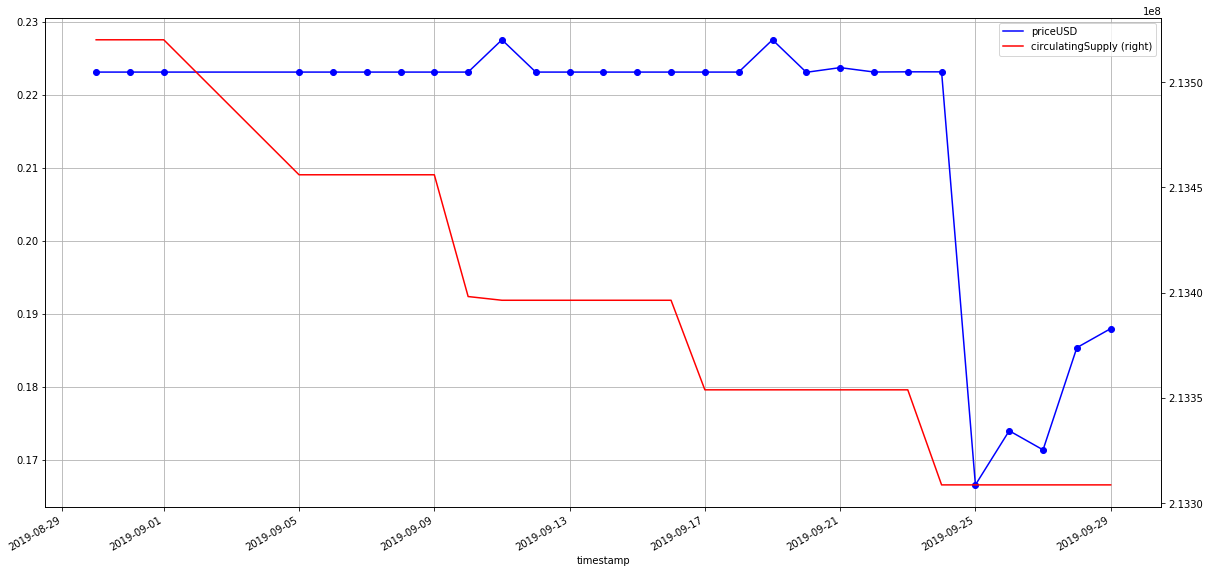

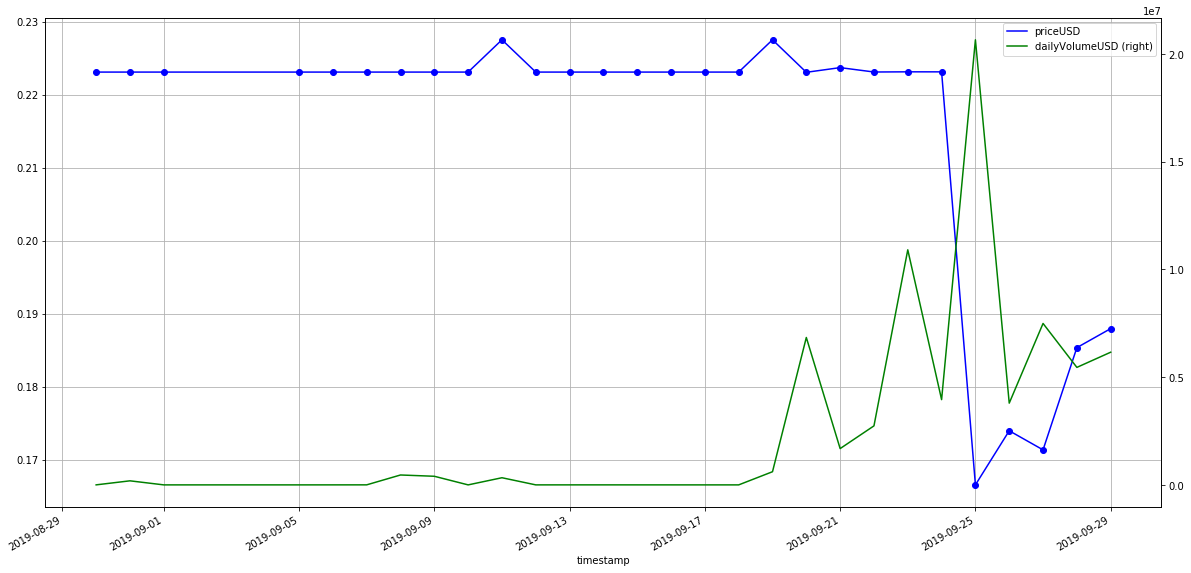

In [8]:
import matplotlib.pyplot as plt

# Plot Price and Circulating Supply time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='priceUSD', c='Blue', grid=True, style='-o')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='circulatingSupply', c='Red', grid=True, secondary_y=True, style='b')
plt.show()

# Plot Price and Volume time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='priceUSD', c='Blue', grid=True, style='-o')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='dailyVolumeUSD', c='Green', grid=True, secondary_y=True, style='b')
plt.show()